In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# Dataset de origem
DS_O = "./data/dataset.csv"
# Dataset Transformado
DS_T = "./data/dataset_transformed.csv"

In [3]:
def transform_o():
    if os.path.exists(DS_T):
        return False
    df = pd.read_csv(DS_O)
    df.columns = df.columns.str.replace(' ', '_')
    df.columns = [col[:-1] if col.endswith('_') else col for col in df.columns]

    mapping = {1: 0, 2: 1}
    columns = ['SMOKING', 'YELLOW_FINGERS', 
           'ANXIETY', 'PEER_PRESSURE', 'CHRONIC_DISEASE', 
           'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL_CONSUMING', 
           'COUGHING', 'SHORTNESS_OF_BREATH', 'SWALLOWING_DIFFICULTY', 
           'CHEST_PAIN']
    # Mapeando para 0 e 1
    df['GENDER'] = df['GENDER'].map({'M': 0, 'F': 1})
    df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'NO': 0, 'YES': 1})

    df[columns] = df[columns].apply(lambda x: x.map(mapping))
    df.to_csv(DS_T, index=False)
    return True

In [4]:
transform_o()

df = pd.read_csv(DS_T)
X = df.drop(columns=['LUNG_CANCER'])
y = df['LUNG_CANCER']
proportions = y.value_counts(normalize=True)

In [5]:
print("Proporção de pessoas com e sem câncer de pulmão no dataset")
print(f"Sem câncer: {proportions[0]}\nCom câncer: {proportions[1]}")

Proporção de pessoas com e sem câncer de pulmão no dataset
Sem câncer: 0.1262135922330097
Com câncer: 0.8737864077669902


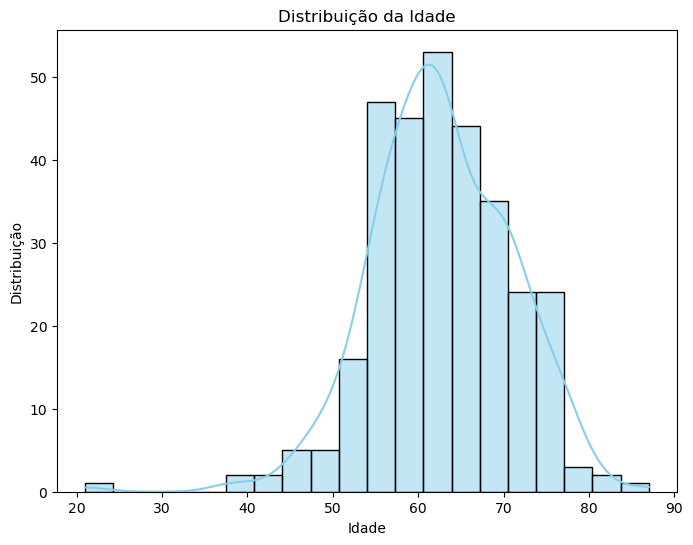

In [6]:
plt.figure(figsize=(8, 6))
sns.histplot(X['AGE'], kde=True, color='skyblue', bins=20)
plt.title('Distribuição da Idade')
plt.xlabel('Idade')
plt.ylabel('Distribuição')
plt.show()


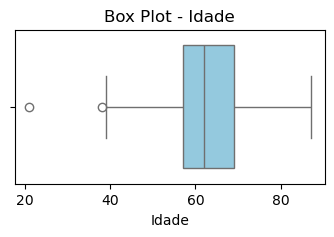

In [7]:
plt.figure(figsize=(4, 2))
sns.boxplot(x=X['AGE'], color='skyblue')
plt.title('Box Plot - Idade')
plt.xlabel('Idade')
plt.show()


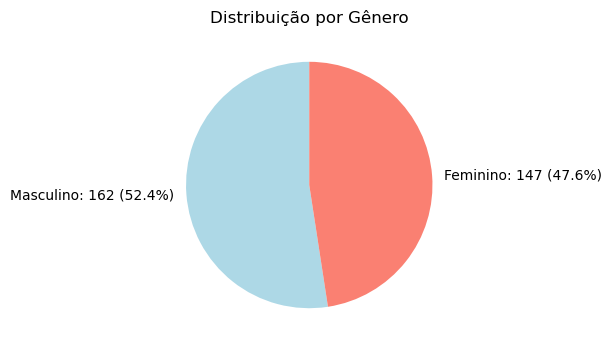

In [8]:
col_distribution = df['GENDER'].value_counts()
col_labels = ['Masculino', 'Feminino']

# Garantir que o índice '0' venha antes de '1'
col_distribution = col_distribution.reindex([0, 1], fill_value=0)

# Calculando a porcentagem
col_percentage = (col_distribution / col_distribution.sum()) * 100


custom_labels = [
    f"{col_labels[i]}: {col_distribution[i]} ({col_percentage[i]:.1f}%)"
    for i in range(len(col_distribution))
]


plt.figure(figsize=(4, 4))
plt.pie(col_distribution, labels=custom_labels, startangle=90, colors=['lightblue', 'salmon'])
plt.title('Distribuição por Gênero')

plt.show()


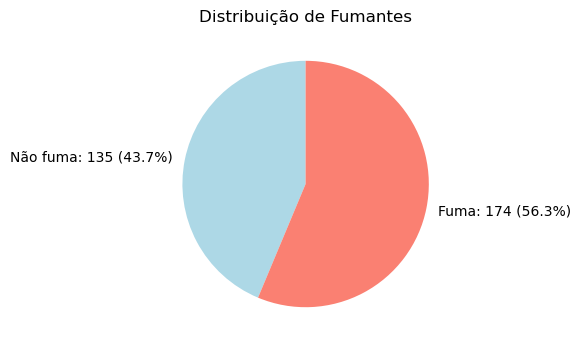

In [9]:
col_distribution = df['SMOKING'].value_counts()
col_labels = ['Não fuma', 'Fuma']

# Garantir que o índice '0' venha antes de '1'
col_distribution = col_distribution.reindex([0, 1], fill_value=0)

# Calculando a porcentagem
col_percentage = (col_distribution / col_distribution.sum()) * 100


custom_labels = [
    f"{col_labels[i]}: {col_distribution[i]} ({col_percentage[i]:.1f}%)"
    for i in range(len(col_distribution))
]


plt.figure(figsize=(4, 4))
plt.pie(col_distribution, labels=custom_labels, startangle=90, colors=['lightblue', 'salmon'])
plt.title('Distribuição de Fumantes')

plt.show()


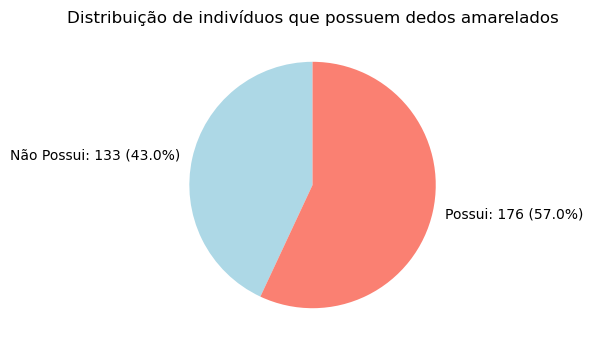

In [10]:
col_distribution = df['YELLOW_FINGERS'].value_counts()
col_labels = ['Não Possui', 'Possui']

# Garantir que o índice '0' venha antes de '1'
col_distribution = col_distribution.reindex([0, 1], fill_value=0)

# Calculando a porcentagem
col_percentage = (col_distribution / col_distribution.sum()) * 100


custom_labels = [
    f"{col_labels[i]}: {col_distribution[i]} ({col_percentage[i]:.1f}%)"
    for i in range(len(col_distribution))
]


plt.figure(figsize=(4, 4))
plt.pie(col_distribution, labels=custom_labels, startangle=90, colors=['lightblue', 'salmon'])
plt.title('Distribuição de indivíduos que possuem dedos amarelados')

plt.show()
